In [6]:
import warnings
from bs4 import BeautifulSoup
import pandas as pd
from pandas import DataFrame, read_csv
import scipy as sc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import cycle, islice
from wordcloud import WordCloud, STOPWORDS

In [8]:
appleData=pd.read_csv(r'applestore.csv',header=0,index_col=0)
appleData.rename(columns={'track_name':'App','size_bytes':'sizeInMB','prime_genre':'Category',
                          'user_rating':'Rating','rating_count_tot':'RatingNum'},inplace=True)
appleData['sizeInMB'] = appleData['sizeInMB'].apply(lambda x: float(x/(1024*1024))) #from bytes to mb (x*10^-6)
appleData['sizeInMB'] = appleData['sizeInMB'].apply(lambda x: '{0:.3f}'.format(x))
appleData.drop(['currency', 'user_rating_ver','cont_rating','ipadSc_urls.num','vpp_lic','rating_count_ver'], axis=1,inplace=True)
appleData.to_csv(r'ApplestoreNew.csv',index=False)

# Popularity of App Categories

The median rating is : 4.0


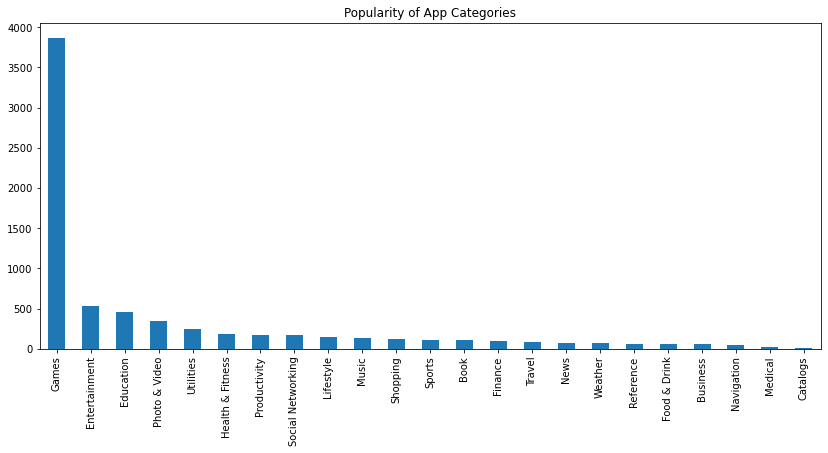

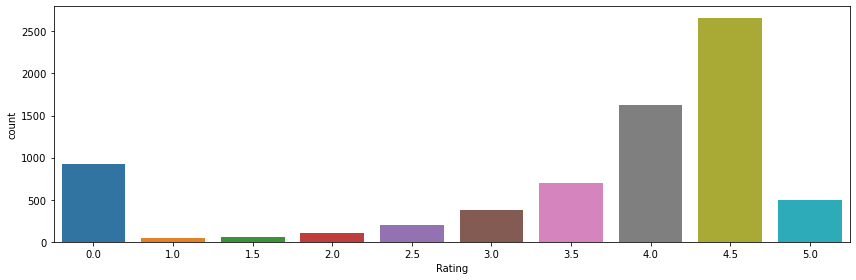

In [10]:
plt.figure(figsize=(14,6))
temp = appleData["Category"]
temp.value_counts().plot.bar()
plt.xticks()
plt.title("Popularity of App Categories")

plt.figure(figsize=(12,4))
sns.countplot(appleData["Rating"])
plt.tight_layout()
print('The median rating is :',appleData.Rating.median())

-As we can see Games is the most popular Category in apple store.
- also we can tell by the first graph is that navigation is among the Categories that are less in apple store,
i suggest that it's because "Apple maps" and "Google maps" providing the best navigation apps and controlling this mobile market.

-Also we can see that apple users happily give good rating, the median rating is 4.0

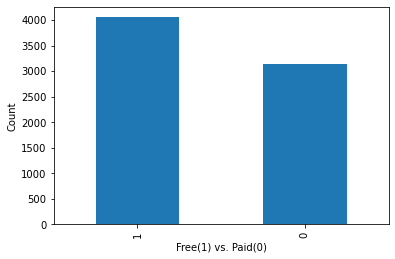

There are  3141  Paid apps
And there are  4056  Free apps


Text(0.5, 1.0, 'Popularity of Free App Categories')

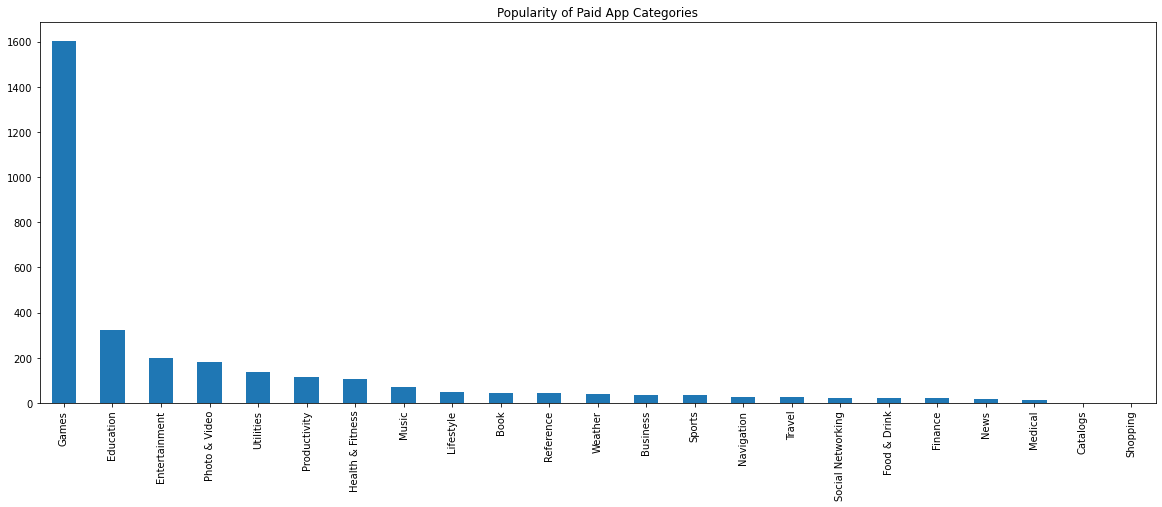

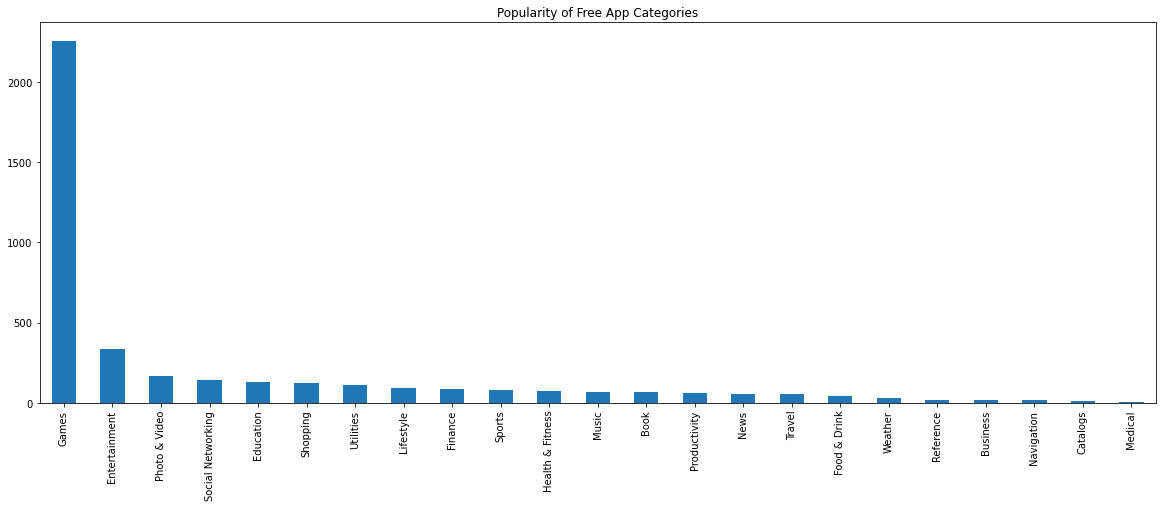

In [4]:
appleData['isFree'] = appleData['price'].apply(lambda x: 1 if x == 0 else 0)
#appleData.drop(['isNotFree'], axis=1,inplace=True)
appleData['isFree'].value_counts().plot.bar()
plt.xlabel('Free(1) vs. Paid(0)')
plt.ylabel('Count')
plt.show()

applePaid = appleData[appleData['isFree'] == 0]
appleFree = appleData[appleData['isFree'] == 1]
print('There are ',applePaid.shape[0],' Paid apps')
print('And there are ',appleFree.shape[0],' Free apps')

plt.figure(figsize=(20,7))
temp = applePaid["Category"]
temp.value_counts().plot.bar()
plt.xticks()
plt.title("Popularity of Paid App Categories")


plt.figure(figsize=(20,7))
temp2 = appleFree["Category"]
temp2.value_counts().plot.bar()
plt.xticks()
plt.title("Popularity of Free App Categories")


-Now we see that games is still the favourite category (free of paid apps)


-Education apps ranked higher in the Paid section, which means apps developers deliberately develop apps in order to get paid, Knowlegde (medical) is power.

In [5]:
cat = appleData.Category.value_counts().index[:11] #theres 23 categories its too much for graph
def categ(x):
    if x in cat:
        return x
    else : 
        return "Others"

appleData['Category']= appleData.Category.apply(lambda x : categ(x))

free = appleData[appleData.price==0].Category.value_counts().sort_index().to_frame()
paid = appleData[appleData.price>0].Category.value_counts().sort_index().to_frame()
total = appleData['Category'].value_counts().sort_index().to_frame()
free.columns=['free']
paid.columns=['paid']
total.columns=['total']

combine = free.join(paid).join(total)
combine['paid_Percentage'] = combine.paid*100/combine.total
combine['free_Percentage'] = combine.free*100/combine.total
# combine['paid_Percentage']=combine['paid_Percentage'].apply(lambda x: '{0:.3f}'.format(x))
# combine['free_Percentage'] = combine['free_Percentage'].apply(lambda x: '{0:.3f}'.format(x))
combine

,free,paid,total,paid_Percentage,free_Percentage
Education,132,321,453,70.860927,29.139073
Entertainment,334,201,535,37.570093,62.429907
Games,2257,1605,3862,41.558778,58.441222
Health & Fitness,76,104,180,57.777778,42.222222
Lifestyle,94,50,144,34.722222,65.277778
Music,67,71,138,51.449275,48.550725
Others,494,327,821,39.829476,60.170524
Photo & Video,167,182,349,52.148997,47.851003
Productivity,62,116,178,65.168539,34.831461
Shopping,121,1,122,0.819672,99.180328


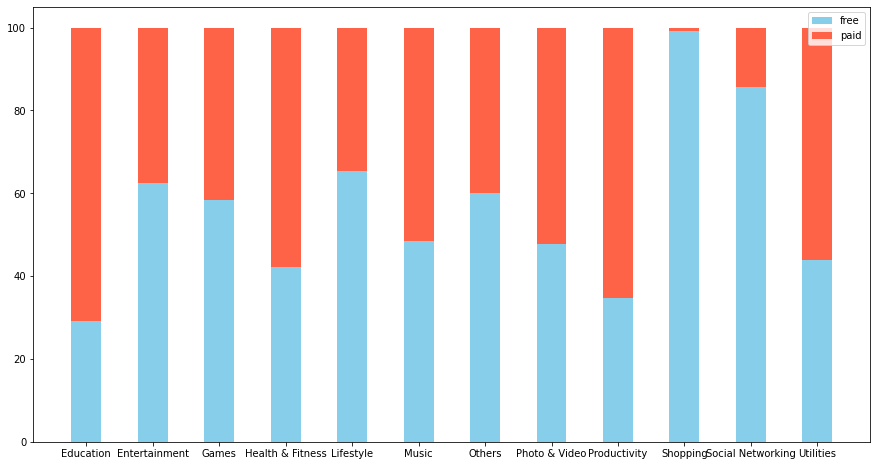

In [6]:
list_free= combine.free_Percentage.tolist()
tuple_free = tuple(list_free)
tuple_paidapps = tuple(combine.paid_Percentage.tolist()) #creating tupples to plot them combine

plt.figure(figsize=(15,8))
N=12
ind = np.arange(N)    # the x locations for the groups
width =0.45

p1 = plt.bar(ind, tuple_free, width, color='skyblue')
p2 = plt.bar(ind, tuple_paidapps, width,bottom=tuple_free,color='tomato')
plt.xticks(ind,tuple(combine.index.tolist() ))
plt.legend((p1[0], p2[0]), ('free', 'paid'))
plt.show()

-As we can see Shoping apps are nearly all free, also Social networks are nearlly all free,
We can explain that theire busniness model its edvertising.

-While most education/Productivity Apps is paid, it make sense because we usally pay for our education, also a lot of people pay "Mentors" in order to gain Productivity, controlling your time and money.

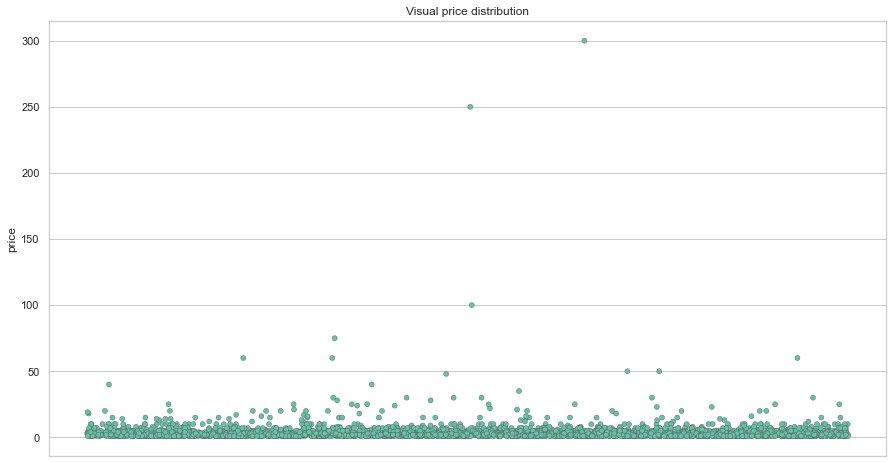

Median price is:  2.99  Average price is:  3.955297675899396
Most expensive app price is 


,id,App,sizeInMB,price,RatingNum,Rating,ver,Category,sup_devices.num,lang.num,isFree
1714,551215116,LAMP Words For Life,556.243,299.99,41,4.0,1.5.5,Education,24,1,0


In [7]:
free = appleData[appleData.price==0]
paid = appleData[appleData.price>0]


sns.set(style="whitegrid")
plt.figure(figsize=(15,8))
plt.title('Visual price distribution')
sns.stripplot(data=paid,y='price',jitter= 0.5,size=5,palette="Set2",linewidth=0.4)
plt.show()

print('Median price is: ',paid.price.median(),' Average price is: ',paid.price.mean())
print('Most expensive app price is ')
appleData.loc[appleData['price'] > 298]

Insights:

Very few apps have been priced above 25 USD

If you want your app get more download the payment should be less than 25 USD

Average price is:  3.95

Most expensive app is from Education category, rated 4.0 and weights more than half GB. 
# is this an anomaly or its normal case?


# Is the size of the app increases the apps price ?

C:\Users\Mor\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Rating VS Reveiws')

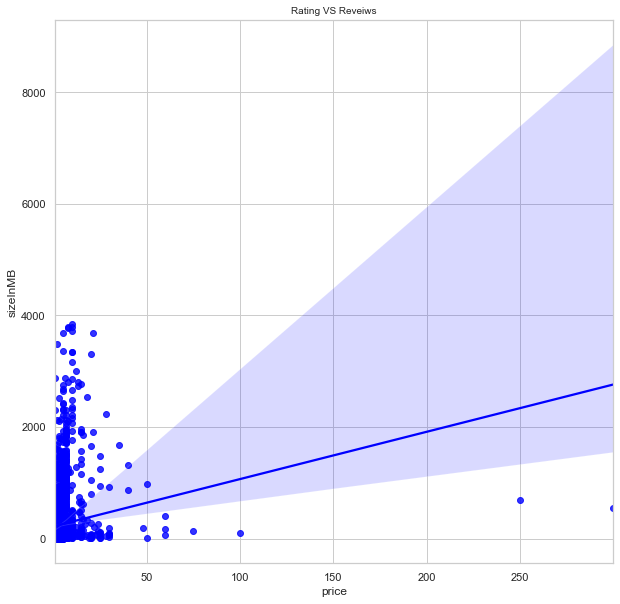

In [8]:
paid['sizeInMB'] = paid['sizeInMB'].apply(lambda x: float(x))


#Size in mb VS price
plt.figure(figsize = (10,10))
sns.regplot(x="price", y="sizeInMB", color = 'blue',data=paid,truncate= True)
plt.title('Rating VS Reveiws',size = 10)


The answer is no,

as we can see there is not connection between the two things.
We can see that pricey apps is nearly 1 GB, while there are many more apps greater than 1GB, and their price is less than 10 usd.


# is the Distribution of User ratings, increasing if the Price is bigger?

Text(0.5, 1.0, 'Mean price by Ratings')

<Figure size 720x360 with 0 Axes>

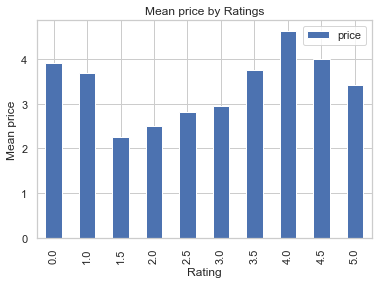

In [9]:
ratingPrice = paid[['Rating', 'price']].groupby('Rating').mean() #mean price by Rating
plt.figure(figsize=(10,5))
temp2 = ratingPrice
temp2.plot.bar()
plt.ylabel("Mean price")
plt.title("Mean price by Ratings")

The answer is no!

As we can see the Top rating apps is not the most expensive apps

Average price in 10 top :  104.49000000000001
Average size in 10 top :  399.2399
Average rating in 10 top :  4.2


,id,App,sizeInMB,price,RatingNum,Rating,ver,Category,sup_devices.num,lang.num,isFree,RawProfit
1714,551215116,LAMP Words For Life,556.243,299.99,41,4.0,1.5.5,Education,24,1,0,1199.960
129,308368164,Proloquo2Go - Symbol-based AAC,690.235,249.99,773,4.0,5.0.1,Education,37,3,0,999.960
3043,849732663,KNFB Reader,101.499,99.99,71,4.5,2.7.3,Productivity,37,14,0,449.955
1324,491998279,Articulation Station Pro,406.188,59.99,294,4.5,2.2.3,Education,38,1,0,269.955
2541,700440156,Articulation Test Center Pro,166.643,59.99,29,4.5,2.6,Education,24,1,0,269.955
184,320279293,NAVIGON Europe,137.723,74.99,927,3.5,2.17,Others,37,21,0,262.465
3899,946930094,FineScanner Pro - PDF Document Scanner App + OCR,61.011,59.99,100,4.0,6.2.5,Others,37,12,0,239.960
7131,1080310524,VPN Pro | Lifetime Proxy & Best VPN by Betternet,11.504,49.99,207,4.5,1.2.2,Others,37,1,0,224.955
1963,583976519,Cubasis 2 - Mobile Music Creation System,984.967,49.99,297,4.0,2.1,Music,24,1,0,199.960
2824,791077159,KORG Gadget,876.386,39.99,1297,4.5,3.0.1,Music,37,5,0,179.955


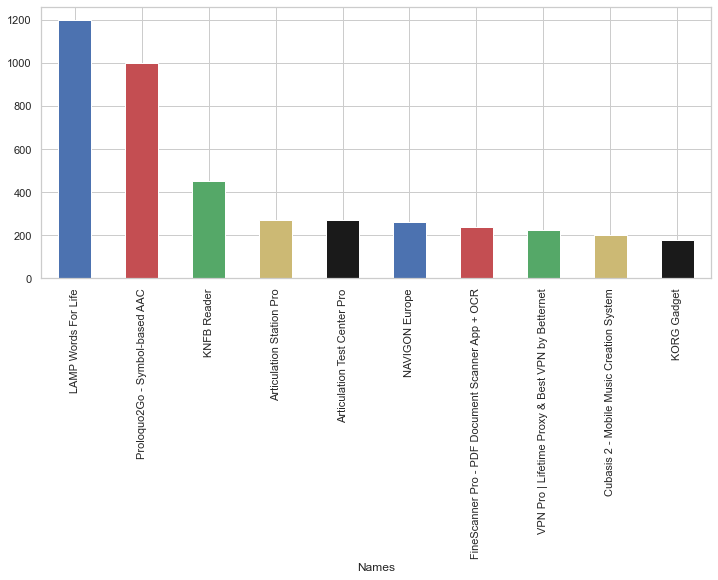

In [14]:
appleData['RawProfit'] = appleData.Rating * appleData.price
appleData['RawProfit'] = appleData['RawProfit'].apply(lambda x: float(x))
appleData['sizeInMB'] = appleData['sizeInMB'].apply(lambda x: float(x))
appleDataProfit = appleData.sort_values("RawProfit", ascending=False)
TenMost = appleDataProfit[:10]

my_colors = ['g', 'b']*5 # mult itself 5 times
my_colors = [(0.5,0.4,0.5), (0.65, 0.75, 0.25)]*5 #make two custom RGBs and repeat over all the bar elements
my_colors = [(x/10.0, x/20.0, 0.75) for x in range(len(TenMost))] #Quick gradient example along the Red/Green dimensions
my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(TenMost)))

df = pd.DataFrame({'Names':TenMost[:10].App, 'Profit':TenMost.RawProfit})
ax = df.plot.bar(x='Names', y='Profit',figsize=(12,5),color=my_colors,legend=False)
plt.xticks(fontsize=11,rotation=90)

print('Average price in 10 top : ',TenMost.price.mean())
print('Average size in 10 top : ',TenMost.sizeInMB.mean())
print('Average rating in 10 top : ',TenMost.Rating.mean())
TenMost

# Insights:

-The avrage price in top 10 apps is about 100 USD, which is not a small price, but all of the apps is above 40 USD,
and between 40-80 usd, in order to earn maximum profit the application should be arond this area of price.

-The average size of applications is about 400mb, The average Rating of this succesful application is 4.2, which is quiet understanable, If you want to profit from application you need that people will love it.

-Most categories here are Education, Music and Productivity - this are the categories that are worth paing for!

# User favorite application:

My guess it's social media (Facebook,Twitter etc...)
but let's check:

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

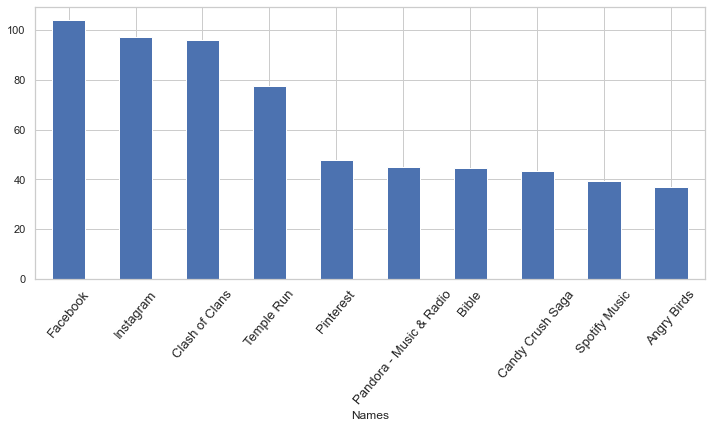

In [15]:
appleData["favesTotal"] = appleData["RatingNum"] * appleData["Rating"]
appleData['favesTotal'] = appleData['favesTotal'].apply(lambda x: float(x))

subsetFav = appleData.sort_values("favesTotal", ascending=False)
topFav = subsetFav[:10]
df2 = pd.DataFrame({'Names':topFav.App, 'Profit':(topFav.favesTotal)/100000})
ax = df2.plot.bar(x='Names', y='Profit',figsize=(12,5),legend=False)
plt.xticks(fontsize=13,rotation=50)


So yes, the most loveable is Facebook and instgram, but also several games and music and the bible(!), thats surprising.

# Correlation:


In [29]:
AppledataCor = appleData.corr(method ='pearson') 

AppledataCor.style.background_gradient(cmap='coolwarm').set_precision(2)

,id,sizeInMB,price,RatingNum,Rating,sup_devices.num,lang.num,isFree,RawProfit,favesTotal
id,1.00,0.08,-0.08,-0.20,-0.19,0.03,-0.13,0.15,-0.08,-0.20
sizeInMB,0.08,1.00,0.18,0.00,0.07,-0.12,0.00,-0.16,0.16,0.01
price,-0.08,0.18,1.00,-0.04,0.05,-0.12,-0.01,-0.34,0.97,-0.04
RatingNum,-0.20,0.00,-0.04,1.00,0.08,0.01,0.14,0.10,-0.03,0.99
Rating,-0.19,0.07,0.05,0.08,1.00,-0.04,0.17,-0.11,0.12,0.09
sup_devices.num,0.03,-0.12,-0.12,0.01,-0.04,1.00,-0.04,0.02,-0.12,0.01
lang.num,-0.13,0.00,-0.01,0.14,0.17,-0.04,1.00,0.04,0.01,0.13
isFree,0.15,-0.16,-0.34,0.10,-0.11,0.02,0.04,1.00,-0.31,0.10
RawProfit,-0.08,0.16,0.97,-0.03,0.12,-0.12,0.01,-0.31,1.00,-0.03
favesTotal,-0.20,0.01,-0.04,0.99,0.09,0.01,0.13,0.10,-0.03,1.00


-As we see there strong correlation between price and raw profit, and Rating count and application favour score.


(It makes sense because in this two contain each other.),
other than that, there is no real strong correlation between others.

# Analyzing Application descriptions

In [209]:
descData = appleData=pd.read_csv(r'appleStore_description.csv',header=0,index_col=0)
#imported new file which contains app store descriptions
descData

,track_name,size_bytes,app_desc
id,,,
281656475,PAC-MAN Premium,100788224,"SAVE 20%, now only $3.99 for a limited time!\n..."
281796108,Evernote - stay organized,158578688,Let Evernote change the way you organize your ...
281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,Download the most popular free weather app pow...
282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,The eBay app is the best way to find anything ...
282935706,Bible,92774400,On more than 250 million devices around the wo...
...,...,...,...
1187617475,Kubik,126644224,Place the falling blocks correctly in order to...
1187682390,VR Roller-Coaster,120760320,A thrilling virtual reality roller coaster exp...
1187779532,Bret Michaels Emojis + Lyric Keyboard,111322112,"Rock star Bret Michaels, winner of Celebrity A..."


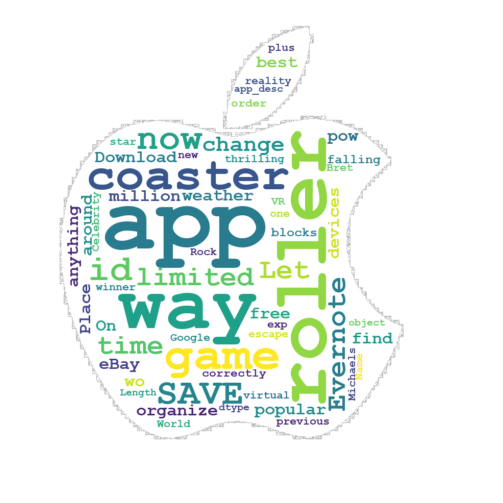

In [85]:
stopwords = set(STOPWORDS)

flag_mask = np.array(Image.open( "apple.jpg"))
wordcloud = WordCloud(mask=flag_mask,font_path = 'C:\Windows\Fonts\courbd.ttf',
   background_color = 'white',contour_width=1,contour_color='silver').generate(str(descData['app_desc']))
# Make the figure
plt.figure(figsize = (15,9))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [210]:
from nltk.probability import FreqDist
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize,RegexpTokenizer
from nltk import FreqDist # Takes a bunch of tokens and returns the frequencies of all unique cases.
descData['number_of_words'] =descData['app_desc'] #save the old description
tokenizer = RegexpTokenizer('^[a-zA-Z]{2,}$')
print(tokenizer)
descData['app_desc'] = descData['app_desc'].apply(tokenizer.tokenize)
wordTokens = FreqDist([item for doc in descData['app_desc'] for item in doc if item.isalpha()])
print('Top 10 words (and their count) is:\n')
j=0
for i,k in sorted(wordTokens.items(),key=lambda x:x[1],reverse=True):
    if(j>9):
        break
    j+=1
    print(i,k)
# descData['app_desc'] = descData['app_desc'].apply(lambda x: str(x))
# descData['totalwords'] = descData['app_desc'].str.split().str.len()

descData['number_of_words'] = descData.number_of_words.apply(lambda x: len(x.split()))

newCount = descData.sort_values(by= ['number_of_words'],ascending=False)[:14]
newCount['size_bytes'] = newCount['size_bytes'].apply(lambda x: float(x/(1024*1024))) #from bytes to mb (x*10^-6)


descDatacorr = descData.corr(method ='pearson') 
descDatacorr.style.background_gradient(cmap='coolwarm').set_precision(2)
print(descDatacorr)
print('\n15 Application whose description is the longest: ')
newCount.drop(['app_desc'], axis=1)


RegexpTokenizer(pattern='^[a-zA-Z]{2,}$', gaps=False, discard_empty=True, flags=<RegexFlag.UNICODE|DOTALL|MULTILINE: 56>)
Top 10 words (and their count) is:

FEATURES 293
Features 111
SUPPORT 24
REQUIREMENTS 15
REVIEWS 15
Privacy 13
LOCALIZATIONS 13
Support 12
NOTES 10
GAMEPLAY 9
                 size_bytes  number_of_words
size_bytes         1.000000         0.111817
number_of_words    0.111817         1.000000

15 Application whose description is the longest: 


,track_name,size_bytes,number_of_words
id,,,
388459613,Carbs & Cals - Diet & Diabetes,199.599609,777
884880797,Magic Tiles : Music Maker - Don't Touch the White,34.838867,767
725222008,"Police Lights 3 - Fire Truck, Police and Param...",36.027344,767
292738169,Deezer - Listen to your Favorite Music & Playl...,121.565430,740
730712409,ProCam 4 - Manual Camera + RAW,42.975586,730
1148944266,Evil Zombie Graveyard Apocalypse Shooting VR G...,123.434570,717
1111420122,Hear My Baby - Baby Heartbeat Monitor App,16.824219,712
1112433234,Timelines - Time Tracking,10.218750,710
556990666,TNNS,40.776989,709


# Insights:

-Every application developer is trying to get new 'Features' into his app, that what make his app so significent.

-Most of Aplications describe section is filled with requirements and support information in order to help user alert on bugs.

-Longest Application descriptions was Productivity, Games and music my insight it's because the Productivity apps need to be explained, How the is app working, What the application purpse and more.
Games also needs to be explained, but also have to have appealing description in order people to play this game instead thousends of games available in AppStore.

-Also we see there is no real strong connection between size of the application number of words in description.